In [1]:
import tensorflow as tf

In [2]:
tf.enable_eager_execution()

# Prepare dataset

In [3]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

mnist_images = tf.cast(tf.expand_dims(mnist_images / 255, axis=-1), tf.float32)
mnist_labels = tf.cast(mnist_labels, tf.int64)

In [4]:
dataset = tf.data.Dataset.from_tensor_slices((mnist_images, mnist_labels))
dataset = dataset.shuffle(1000).batch(32)

# Model

In [9]:
inputs = tf.keras.Input(shape=mnist_images.numpy().shape[1:]) # (None, 28, 28, 1)
conv1 = tf.keras.layers.Conv2D(filters=16, kernel_size=[3,3], activation='relu')(inputs) # (None, 26, 26, 16)
conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=[3,3], activation='relu')(conv1) # (None, 24, 24, 16)
pool = tf.keras.layers.GlobalAveragePooling2D()(conv2) # (None, 16)
outputs = tf.keras.layers.Dense(10)(pool) # (None, 10)

model = tf.keras.Model(inputs, outputs)

In [12]:
optimizer = tf.train.AdamOptimizer()

loss_history = []

for (batch, (images, labels)) in enumerate(dataset.take(400)):
  if batch % 10 == 0:
    print('.', end='')
  with tf.GradientTape() as tape:
    logits = model(images, training=True)
    loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

  loss_history.append(loss_value.numpy())
  grads = tape.gradient(loss_value, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables),
                            global_step=tf.train.get_or_create_global_step())

........................................

Text(0, 0.5, 'Loss [entropy]')

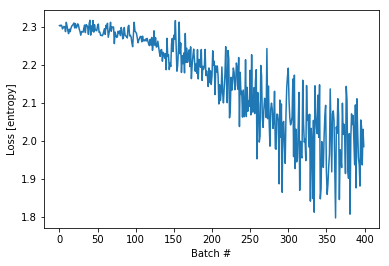

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')